### End-to-End Blood Spectroscopy Deep Learning Project

#### Using Blood Spectroscopy Data to Predict Levels of Cholesterol in the Blood - Follow along!

<img src="Images/cover.jpg" alt="Cover Image" width = 500>

### Overview

<img src="Images/project_flow.jpg" alt="project flow" width = 500>

##### 1 -  Introduction to Blood Spectroscopy
- What is blood spectroscopy, how does it work and what are its benefits?
##### 2 - Setting things up
- VS Code, Jupyter notebook and data source
##### 3.1 - Project Background and Libraries
##### 3.2 - Data Exploration (Using Pandas and Seaborn)
- Assessing the distribution of our target variable
##### 3.3 - Data Preprocessing (Using Sklearn)
- Feature Selection
- Standardisation and splitting of data
##### 3.4 - Model Building (Using Tensorflow, Keras and Optuna)
- Deep learning
- Hyperparameter optimisation 
##### 3.5 - Model Evaluation and Interpretation (Using SHAP)
- Model Accuracy
- Confusion Matrix
##### 4 - Thoughts and Reflections

#### 1 -  Introduction to Blood Spectroscopy
Going into a data science project without much contextual knowledge can remove a layer of depth and excitement, so before I delve into this article I would like to give a brief introduction to the world of blood spectroscopy.
 
Blood spectroscopy studies how blood interacts with various wavelengths of light. This is done to analyse its composition and properties. 

<img src="images/blood_spec.jpg" alt="Spectroscopy Image" width="500">

From the above image we see how varying the wavelength of light has resulted in different transmittance levels, which is the proportion of light that passes through a sample.

Different substances absorb different amounts of light at specific wavelengths, we can therefore use the patterns produced from blood spectroscopy to identify which substances exist in the blood.
Here are a few main types of blood spectroscopy:

- **Raman Spectroscopy:** A laser is shined on a blood sample and the scattered light is studied. Different molecules present in the blood cause unique patterns of scattered light, known as a fingerprint. Different blood components can be identified from raman spectroscopy such as glucose, which is important for managing diabetes.

- **Flourescence Spectroscopy:** Blood is exposed to light causing certain components in the blood to emit (or "flouresce") light back. The emitted light is analysed to identify and measure specific substances in the blood. If you came across a crime scene and wanted to figure out the age of a blood stain, flourescence spectroscopy can be used.

- **Infrared (IR) Spectroscopy:** The absorption of infrared light by blood components are assessed, which provides information about molecular vibrations and the chemical bonds present. This is useful for detecting disease markers and understanding the molecular composition of blood. 

In this article we focus on Near-Infrared (NIR) Spectroscopy which is a type of Infrared (IR) Spectroscopy that focusses on lower wavelengths (approximately 780nm to 2,500nm).
LDL Cholesterol is often referred to as "bad" cholesterol as high levels of this type of cholesterol can increase your risk of heart disease, stroke and other health problems.

#### 2 - Setting things up

I would recommend running this project in Visual Studio (VS) Code together with Jupyter extension. This extension enables you to run blocks of code and see outputs directly in a notebook.

[Visual Studio Code](https://code.visualstudio.com/)

[Extension for Visual Studio Code Jupyter Notebook](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.jupyter)

Data for this project can be extracted from: https://zindi.africa/competitions/bloodsai-blood-spectroscopy-classification-challenge/data

To gain access to the data you are required to make an account.
Scroll down and download **OriginaData.zip** and extract the files to a desired location. For this project, we use just Train.csv as Test.csv does not contain our target feature. For clarity, I rename Train.csv to Blood_spectroscopy_ldl.csv.

**Making a virtual environment**

For this project we work with quite a few libraries (see next section). To avoid any conflicts we can make a virtual environment to install these libraries in.
To make a virtual environment, in our terminal we can write:

<code>python -m venv deeplearning_env</code>

Here I label our virtual environment "deep_learning".

Next we activate it

For Windows: <code>deeplearning_env\Scripts\activate</code>
For macOS/Linux: <code>source deeplearning_env/bin/activate</code>

There are a few libraries we can then install:

<code>pip install  pandas seaborn matplotlib numpy scikit-learn tensorflow tensorflow optuna shap</code>

We go over, very briefly, each of these libraries in the next section.

#### 3.1 - Project Background and Libraries

**Objective**

The objective for this project is to Develop a deep learning model on blood spectroscopy data to predict low, ok or high levels of LDL cholesterol.

**Dataset**

Spectral data from the Near Infra-Red (NIR) wavelengths ranges (950 nm to 1350 nm) extracted from Bloods.ai. contains 170 absorbance numbers, temperature and humidity at the time of the measurement and target features. 60-rapid fire scans per 486 individuals were taken resulting in 29,160 samples for analysis.

**libraries**

The first thing we do is import our libraries. Libraries can be thought of as pre-written code that are used for common computing tasks. Instead of having to draw a graph or build a machine learning model from scratch, we can use libraries.

Here, I would like to introduce you to some common data science libraries, all of which we use in this project:


<img src="Images/table_libraries.jpg" alt="Spectroscopy Image" width="650">


To import these libraries in Python we can use the following code:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import imblearn
import tensorflow as tf
import optuna
import shap

c:\The Health Algorithm\End-to-end Blood Spectroscopy Data Science Project\deeplearning_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### 3.2 - Data Exploration (Using Pandas and Seaborn)

Before delving deep into building predictive models, it is important to get a feel of our data.

We first make use of the pandas <code>read_csv()</code> function and import our data into Python.

In [2]:
# Read data into Python
df = pd.read_csv('data\\Blood_spectroscopy_ldl.csv')

To get a better feel of the data, we can view the first few rows by making use of the pandas <code>.head()</code> method.

In [3]:
# View first few rows of training  data
df.head()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_3SSHI56C,0.479669,0.477423,0.487956,0.491831,0.500516,0.502590,0.511561,0.514639,0.524245,...,1.218660,1.213038,1.198317,1.195735,1.180846,42.51,34.01,ok,ok,ok
1,ID_599OOLZA,0.471537,0.474113,0.479981,0.485528,0.491049,0.497942,0.504760,0.510543,0.522328,...,1.304501,1.323005,1.305992,1.263887,1.262095,44.52,32.09,ok,high,high
2,ID_MVJGPQ75,0.444998,0.458034,0.447386,0.456921,0.463225,0.475983,0.476817,0.481565,0.490010,...,1.325059,1.271115,1.337119,1.289877,1.345229,45.77,24.80,ok,ok,high
3,ID_CK6RF8YV,0.513434,0.513303,0.522609,0.521068,0.523146,0.530132,0.539517,0.546364,0.552414,...,1.298422,1.299873,1.311157,1.303259,1.349833,45.84,36.93,low,ok,high
4,ID_82N6QE6I,0.510485,0.519359,0.524225,0.528419,0.535273,0.545342,0.550314,0.557129,0.567030,...,1.272367,1.290032,1.339771,1.322738,1.348964,38.92,23.88,ok,ok,high


From the above output we can see the various absorbance numbers, temperature and humidity but we also see a few target features (features that would be useful to predict). 
These are:

- hdl_cholesterol_human (the level of HDL cholesterol)
- cholesterol_ldl_human (the level of LDL cholesterol)
- hemoglobin(hgb)_human (The level of hemoglobin)

Each target feature can take three values: low, ok or high.

In this project, we focus on predicting just the level of **LDL cholesterol**.
Next, let us take a look at the distribution of our target variable:

Text(0.5, 0, 'LDL Cholesterol Level')

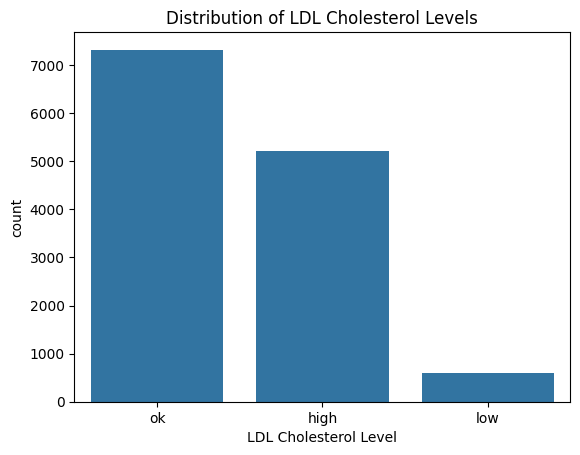

In [4]:
# Display counts of LDL cholestrol values
countplot = sns.countplot(x='cholesterol_ldl_human', data=df)
countplot.set_title('Distribution of LDL Cholesterol Levels')
countplot.set_xlabel('LDL Cholesterol Level')

From the above graph we see quite clearly that the data is imbalanced. More specifically, the number of low LDL cholesterol cases are much lower. 

You can imaginge if we had 100 samples of apples and oranges, with 1 apple and 99 oranges - if our model predicted oranges for all samples we would have an accuracy of 99%! This may look amazing - but we didn't manage to predict our only apple. Poor apple, being grouped together with the oranges ^^

There are several methods to deal with imbalanced data, some of which are described here: https://medium.com/@linguisticmaz/solving-imbalanced-data-5f0aad44844c

For this project we are going to use SMOTE (Synthetic Minority Oversampling TEchnique) - use the above link to find out more about how this method works!

### 3.3 Data Preprocessing

This is arguably the most important section of this project. 
Build a model on nonsense data and we get nonsense results!
Remember the same pre-processing steps we apply to the training set must also be applied to the test set.

#### 3.31 Label Encoding

Models work with numbers and not words, so for the first step, we are going to convert our target variable into numbers. Namely, map "low" to 0, "ok" to 1 and "high" to 2. This is what is known as label encoding.

In [5]:
# Encode LDL cholesterol levels
mapping = {'low': 0, 'ok': 1, 'high': 2}

# Apply the mapping to entire dataframe
df['cholesterol_ldl_encoded'] = df['cholesterol_ldl_human'].map(mapping)

##### 3.32 Defining Input and Target Variables

For our model, we want to use as much useful information as possible to predict ldl cholesterol levels (our target variable). In particular, all informative absorbance values, humidity and temperature (our input variables).

In [6]:
# Select features with the word 'absorbance' in their name, humidity and temperature as input features
X = df.filter(regex='absorbance|humidity|temperature')

# Define target as cholesterol_ldl_encoded 
y = df['cholesterol_ldl_encoded']

#### 3.33 Split into train and test set

Since we are working with one big table of data, it is important we split our data into a training and test set, an explanation of why we do this can be found here https://medium.com/@linguisticmaz/cross-validation-explained-6496e68d62a7


In [7]:
# Import sklearn train_test_split function to split our data into a training and test set
from sklearn.model_selection import train_test_split

# Split data into training and testing sets, use 20% test size, ensure roughly the same proportion of each class in the training and test set by using stratify = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#### 3.34 Feature Selection

There are many different ways to apply feature selection, for this project we are going to train another popular and effective machine learning model, called a random forest classifier to determine the importance of different features in predicting our target variable, in this case looking at the mean decrease in Gini impurity. Read more how this is done here: https://medium.com/@linguisticmaz/feature-importance-explained-main-models-7909cd6b724d

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Fit Random Forest Classifier to our training data
selector = RandomForestClassifier(n_estimators=100, random_state= 42).fit(X_train, y_train)

# Select important features from model (feautres that have an importance about the mean)
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(selector, prefit=True)

# Retrieve selected feature names
selected_features = X_train.columns[model.get_support()]
print("Selected features:", selected_features.tolist())

# Transform training and test set to only include selected features
X_train_selected = model.transform(X_train)
X_test_selected = model.transform(X_test)

Selected features: ['absorbance3', 'absorbance5', 'absorbance6', 'absorbance7', 'absorbance31', 'absorbance34', 'absorbance35', 'absorbance36', 'absorbance37', 'absorbance38', 'absorbance39', 'absorbance40', 'absorbance41', 'absorbance42', 'absorbance45', 'absorbance46', 'absorbance48', 'absorbance56', 'absorbance59', 'absorbance60', 'absorbance61', 'absorbance68', 'absorbance71', 'absorbance72', 'absorbance73', 'absorbance74', 'absorbance75', 'absorbance76', 'absorbance77', 'absorbance78', 'absorbance79', 'absorbance80', 'absorbance81', 'absorbance82', 'absorbance83', 'absorbance84', 'absorbance85', 'absorbance86', 'absorbance87', 'absorbance88', 'absorbance89', 'absorbance90', 'absorbance91', 'absorbance92', 'absorbance93', 'absorbance94', 'absorbance95', 'absorbance96', 'absorbance97', 'absorbance98', 'absorbance112', 'absorbance117', 'absorbance125', 'absorbance161', 'absorbance163', 'absorbance164', 'absorbance165', 'absorbance166', 'absorbance167', 'absorbance168', 'temperature',

c:\The Health Algorithm\End-to-end Blood Spectroscopy Data Science Project\deeplearning_env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\The Health Algorithm\End-to-end Blood Spectroscopy Data Science Project\deeplearning_env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


#### 3.35 Standardising data
Because absorbance readings sit around 0.2–2 while humidity is 17–63 and temperature 30–53, we standardise every column to the same scale so the model pays equal attention to the small absorbance values and the bigger humidity/temperature numbers. Essentially putting each of our input features on the same playing field! 
For this we make use of the StandardScaler function from sklearn:

In [9]:
from sklearn.preprocessing import StandardScaler

# Scale the features (fit on training only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled  = scaler.transform(X_test_selected)

#### 3.36 Dealing with Imbalanced Data

Earlier in 3.2-Data Exploration, we discovered that our target feature was imbalanced. To deal with this, for this project - we are going to use the oversampling technique (get more of our minority class) called SMOTE (Synthetic Minority Oversampling TEchnique).

An explanation of this technique can be found here: https://medium.com/r?url=https%3A%2F%2Flinguisticmaz.medium.com%2Fsolving-imbalanced-data-5f0aad44844c

In [10]:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print("Class counts after SMOTE:", np.bincount(y_train_bal))

Class counts after SMOTE: [5856 5856 5856]


We can see from the above output, that after applying this technique - our target classes in our training set are now all balanced with 5856 samples each.

The test set must remain untouched!

Let's do a quick plot to show how the number of synthetic classes that were added to each class:

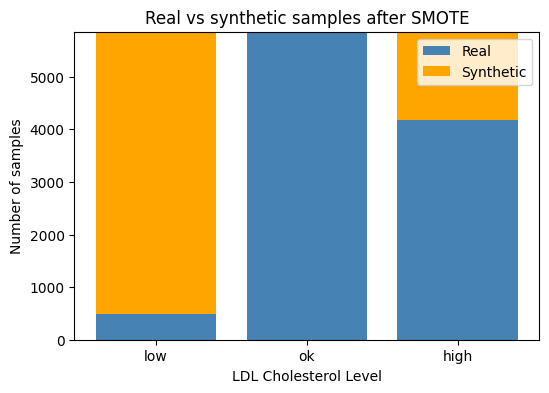

In [11]:
# Count how many samples per LDL class **before** SMOTE (real data)
orig = y_train.value_counts().sort_index()            

# Count how many **synthetic** samples SMOTE added
syn  = pd.Series(y_train_bal).value_counts().sort_index() - orig

# Convert to aligned numpy arrays (low, ok, high order)
orig_counts = orig.reindex([0, 1, 2]).values
syn_counts  = syn .reindex([0, 1, 2]).fillna(0).values

# Plot stacked bars 
classes = ["low", "ok", "high"]
plt.figure(figsize=(6,4))
plt.bar(classes, orig_counts, label="Real", color="steelblue")
plt.bar(classes, syn_counts,  bottom=orig_counts,
        label="Synthetic", color="orange")

plt.ylabel("Number of samples")
plt.xlabel("LDL Cholesterol Level")
plt.title("Real vs synthetic samples after SMOTE")
plt.legend()
plt.show()

#### 3.37 Building a preprocessing pipeline

We can save all our preprocessing steps in a pipeline - so we don't have to apply each individual step again to our training data - our any future datasets that are of a similar format. We make use of the Pipeline fuction from Imbalanced Learn to do this:

In [12]:
from imblearn.pipeline import Pipeline

pipe = Pipeline(
    steps=[
        ("selector",  SelectFromModel(selector, threshold="mean")),
        ("scaler",    StandardScaler()),
        ("smote",     SMOTE(random_state=42)),
    ]
)

#### 3.37 OHE for Deep Learning Model

The final pre-processing step is to one-hot encode our target feature to be used in our deep learning model:

<img src="Images/OHE.jpg" alt="OHE" width = 600>

We one-hot encode the labels so the deep learning model can match each of its three output slots to a simple 0-or-1 target.

In [13]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
y_train_ohe = ohe.fit_transform(y_train_bal.to_numpy().reshape(-1, 1))
y_test_ohe  = ohe.transform(y_test.to_numpy().reshape(-1, 1))

#### 3.4 Building Our Deep Learning Model 

Now that we have completed our pre-processing in section 3.3, it is time to build our Deep Learning model.

A deep-learning model is a multilayer neural network.

<img src="Images/DL.jpg" alt="Deep Learning Architecture" width = 600>


I plan to make a series just on deep learning soon, so please stay tuned! I will not dive too deeply in this model (pun maybe intended) for this article but will briefly touch on a few important hyperparameters, parts of the model we can configure - see Episode 12.1 [How to Optimize Hyperparamters for Machine Learning Models](https://medium.com/@linguisticmaz/how-to-optimize-hyperparameters-for-machine-learning-models-c30dae8fe34):

<img src="Images/HP.jpg" alt="Hyperparameters" >

Programming this model from scratch is incredibly time consuming.

Thankfully, there are off the shelf libraries that enable us to implement this algorithm very quickly. For this project we use Google's Tensorflow library.

For this first step we define a function build_model. We do this as we want to vary our hyperparameters to find our best model - a process called hyperparameter optimization. We make use of Optuna library to help us:


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(trial):
    
    ## a) Hyper-parameter sampling ##

    n_layers = trial.suggest_int('n_layers', 1, 4)  # Number of hidden layers, choose between 1 and 4 must be int
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)  # Dropout rate, choose between 0.0 and 0.5 can be float
    units = trial.suggest_categorical('units', [32, 64, 128, 256, 512])  # Units in each layer, choose one of the categeries in the list
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)  # Learning rate for Adam, between  1 × 10⁻⁵ and 1 × 10⁻¹
    
    
    ## b) Network assembly ##
    
    model = Sequential()

    # Add input layer snd hidden layer
    model.add(Dense(units=units, activation='relu', input_shape=(X_train_bal.shape[1],)))
    model.add(Dropout(dropout_rate))
    
    # Add n_layers more hidden layer/s
    for i in range(n_layers):
        model.add(Dense(units=units, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    # Add output layer
    model.add(Dense(3, activation='softmax'))
    
    ## c) Compile model ##

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

## d) Train & return best val-accuracy ## 

def objective(trial):
    
    model = build_model(trial)
    
    history = model.fit(X_train_bal, y_train_ohe, epochs=10, validation_split=0.1, verbose=0, batch_size=32)
    
    # Obtain the best validation accuracy from the training history
    best_accuracy = max(history.history['val_accuracy'])
    
    return best_accuracy


# Define sampler for reproducible results
sampler = optuna.samplers.TPESampler(seed = 21)

# Initialise a study using Optuna, set the number of trials to be 15 and
# identify which set of parameters result in the highest accuracy

study = optuna.create_study(direction='maximize', sampler=sampler)

study.optimize(objective, n_trials=15)


[I 2025-06-06 19:09:51,571] A new study created in memory with name: no-name-775c9bb6-a0f8-4c4e-9b2c-bba78c5a34c7
c:\The Health Algorithm\End-to-end Blood Spectroscopy Data Science Project\deeplearning_env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2025-06-06 19:10:45,399] Trial 0 finished with value: 0.9060899019241333 and parameters: {'n_layers': 1, 'dropout_rate': 0.14455482989490842, 'units': 32, 'learning_rate': 0.0045252354274507595}. Best is trial 0 with value: 0.9060899019241333.
[I 2025-06-06 19:11:28,466] Trial 1 finished with value: 0.043824702501297 and parameters: {'n_layers': 2, 'dropout_rate': 0.29179563810929937, 'units': 64, 'learning_rate': 0.028496962981618558}. Best is trial 0 with value: 0.90608990192

In [15]:
# Extract best hyperparameters
best_hyperparams = study.best_params
print("Best hyperparameters:", best_hyperparams)

Best hyperparameters: {'n_layers': 3, 'dropout_rate': 0.029614582617675744, 'units': 128, 'learning_rate': 0.0026592271899731905}


In [16]:
# Rebuild the model using the best hyperparameters

def best_model(best_hyperparams):
    
    model = Sequential()
    
    model.add(Dense(units=best_hyperparams['units'],
                    activation='relu', input_shape=(X_train_bal.shape[1],)))
    model.add(Dropout(best_hyperparams['dropout_rate']))
    
    for i in range(best_hyperparams['n_layers']):
        model.add(Dense(units = best_hyperparams['units'], activation='relu'))
        model.add(Dropout(best_hyperparams['dropout_rate']))
   
    model.add(Dense(3, activation='softmax'))  
    
    optimizer = Adam(learning_rate=best_hyperparams['learning_rate'])
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

best_model = best_model(best_hyperparams)


c:\The Health Algorithm\End-to-end Blood Spectroscopy Data Science Project\deeplearning_env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Train best model on entire training set - epochs set to 15 to save time (set higher for better performance but takes more time!)

best_model.fit(X_train_bal, y_train_ohe, epochs=15, validation_split=0.1, batch_size=32, verbose=2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)])

Epoch 1/15
495/495 - 7s - 15ms/step - accuracy: 0.7945 - loss: 0.4245 - val_accuracy: 0.7126 - val_loss: 0.5427
Epoch 2/15
495/495 - 3s - 6ms/step - accuracy: 0.9208 - loss: 0.1908 - val_accuracy: 0.9328 - val_loss: 0.1872
Epoch 3/15
495/495 - 3s - 5ms/step - accuracy: 0.9481 - loss: 0.1411 - val_accuracy: 0.9357 - val_loss: 0.1305
Epoch 4/15
495/495 - 3s - 6ms/step - accuracy: 0.9672 - loss: 0.0949 - val_accuracy: 0.9863 - val_loss: 0.0390
Epoch 5/15
495/495 - 3s - 6ms/step - accuracy: 0.9805 - loss: 0.0611 - val_accuracy: 0.9852 - val_loss: 0.0423
Epoch 6/15
495/495 - 3s - 6ms/step - accuracy: 0.9800 - loss: 0.0602 - val_accuracy: 0.9789 - val_loss: 0.0665
Epoch 7/15
495/495 - 3s - 6ms/step - accuracy: 0.9853 - loss: 0.0513 - val_accuracy: 0.9254 - val_loss: 0.2195
Epoch 8/15
495/495 - 3s - 5ms/step - accuracy: 0.9825 - loss: 0.0542 - val_accuracy: 0.9886 - val_loss: 0.0489
Epoch 9/15
495/495 - 3s - 7ms/step - accuracy: 0.9805 - loss: 0.0577 - val_accuracy: 0.9835 - val_loss: 0.0754


#### 3.5 Model Evaluation

After building our model it is important to see how well it performs on data it has never seen before (this is what we call the "test" set). 

It is important we apply the same preprocessing steps we did on our training data, on our test data. Thankfully this has been done earlier in sections 3.31, 3.34 and 3.35.

That includes label encoding,feature selection and standard scaling. We do not apply SMOTE as it is important that we do not add "synthetic" data that may not be reflective of real life. SMOTE was used to ensure the model does not bias to the majority class during the **training** phase.

For this section we look at the AUC score of our model and produce a confusion matrix. Both concepts are explained in a previous article here: [Episode 10.3](https://medium.com/r?url=https%3A%2F%2Flinguisticmaz.medium.com%2Fevaluating-classification-algorithms-869f128ec0a)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


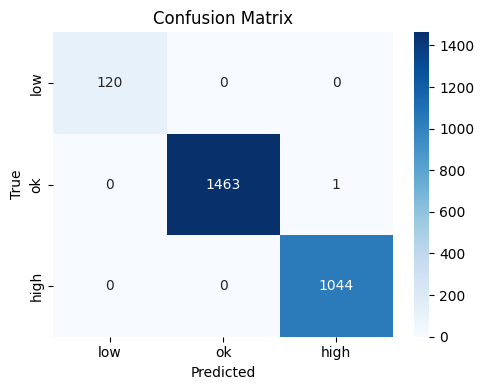

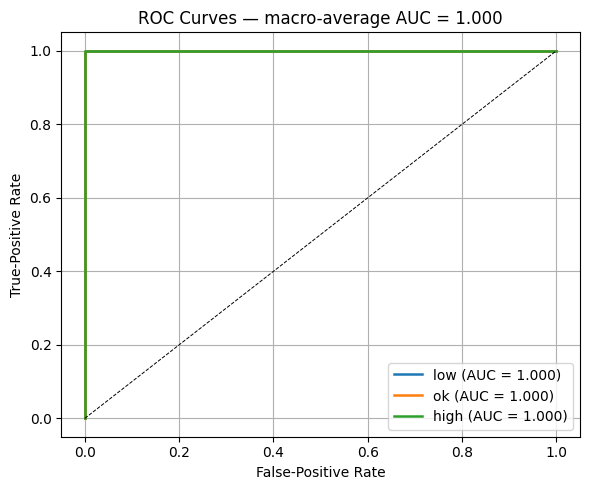

In [26]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Generate a set of probabilities for each class and select the class with the highest probability as the model prediction
y_prob = best_model.predict(X_test_scaled)              
y_pred = np.argmax(y_prob, axis=1)                      

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_names = ['low', 'ok', 'high']

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix')
plt.tight_layout(); plt.show()

# Generate ROC-AUC curve for each class, and compute average Macro AUC score

class_names = ['low', 'ok', 'high']
plt.figure(figsize=(6,5))

for i, cname in enumerate(class_names):
    fpr_i, tpr_i, _ = roc_curve(y_test_ohe[:, i], y_prob[:, i])
    auc_i = roc_auc_score(y_test_ohe[:, i], y_prob[:, i])
    plt.plot(fpr_i, tpr_i, lw=1.8, label=f"{cname} (AUC = {auc_i:.3f})")


auc_macro = roc_auc_score(y_test_ohe, y_prob, average="macro")

plt.plot([0,1], [0,1], "k--", lw=0.7)
plt.xlabel("False-Positive Rate")
plt.ylabel("True-Positive Rate")
plt.title(f"ROC Curves — macro-average AUC = {auc_macro:.3f}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The above output shows near perfect model performance on our test set! With just a single misclassification of predicting OK LDL Cholesterol for an individual that had High LDL Cholesterol. Pretty impressive stuff ayy?

#### 3.6 Model Interpretation

We are not done yet! 
Now that we have built the model, it's time to see how our model came to certain decisions. For this we use SHAP (SHapley Additive exPlanations).

Very briefly, SHAP (SHapley Additive exPlanations) breaks down each prediction into feature-level contributions. A positive SHAP value means that feature pushes the model's probability up for that class and a negative value pushes it down. 

Image by Author using SHAPIn this project, plotting these values lets us see which wavelengths, humidity, or temperature readings are truly driving the model's "low / ok / high" predictions.


c:\The Health Algorithm\End-to-end Blood Spectroscopy Data Science Project\deeplearning_env\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_684
Received: inputs=['Tensor(shape=(5000, 62))']
  warnings.warn(msg)


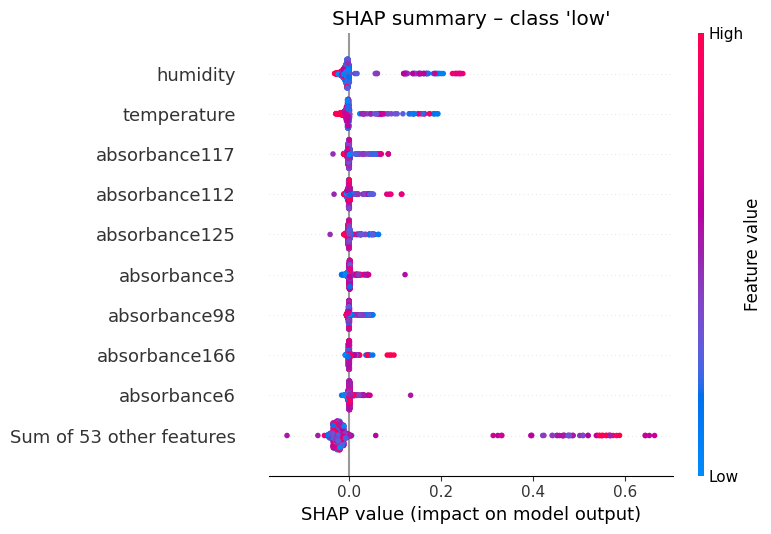

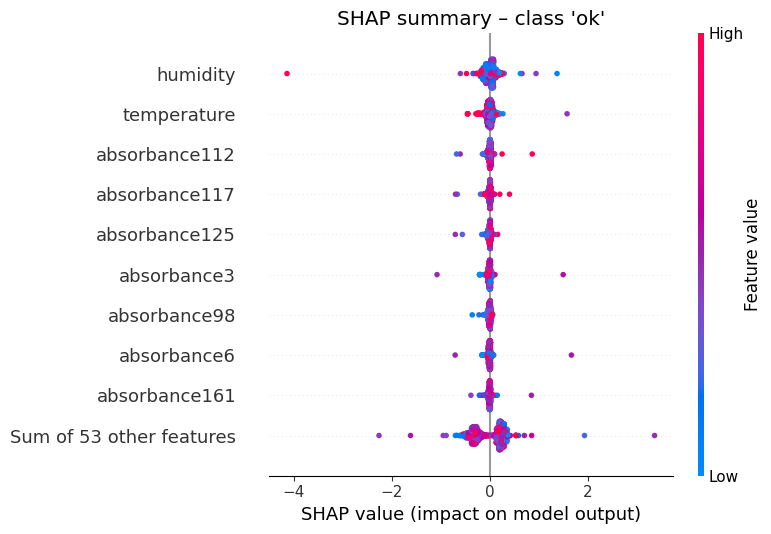

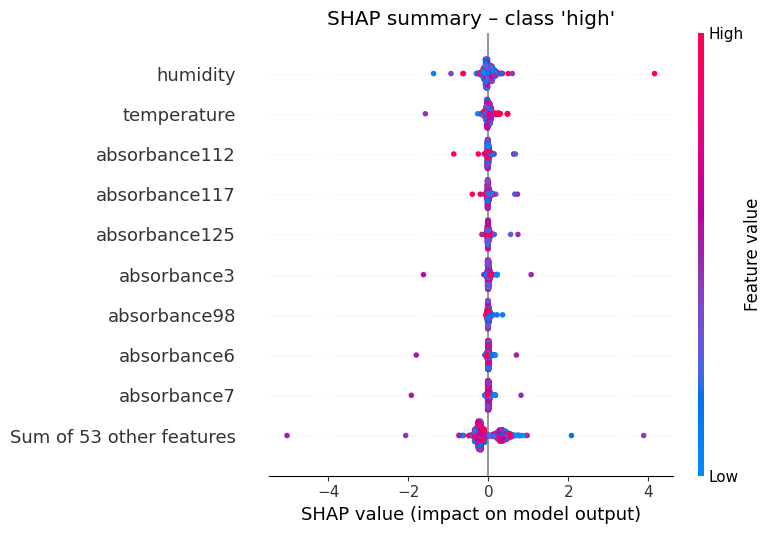

In [ ]:
# Extract samples of training data and test data (ideally you would use all training and test data but this can take quite some time to run!)
X_ref = X_train_scaled[:5000]
X_sample = X_test_scaled[:1000]

# Identify class names
class_names = ["low", "ok", "high"]

# Compute SHAP values per class
explainer = shap.DeepExplainer(best_model, X_ref)
shap_values = explainer.shap_values(X_sample) 

shap_values_per_class = np.transpose(shap_values, (2, 0, 1)) 

# Produce a beeswarm plot for each class
for i in range(3):
    shap_class = shap_values_per_class[i]  
    
    exp = shap.Explanation(
        values=shap_class,
        data=X_sample,  
        feature_names=selected_features
    )
    
    shap.plots.beeswarm(exp, show=False)
    plt.title(f"SHAP summary – class '{class_names[i]}'")
    plt.tight_layout()
    plt.show()

The above plots are ranked according the feature importance (average absolute SHAP value), with more important features in predicting the class at the top and less important at the bottom.
From the above plots we can make a few conclusions:

1. Humidity and Temperature at the time of blood spectroscopy readings are the two most important features in predicting LDL Cholesterol levels.

2. Absorbance values at 112, 117, 125, 3, 98 and 6 (each corresponding to different wave lengths of light) have strong predictive power for each level of LDL Cholesterol.

3. We can see blue and red feature values on each side of the x= 0 line. This suggests that high or low feature values alone don't consistently push our predictions of low, ok or high cholesterol in one direction. 
In other words, a high reading of one variable can raise LDL in some samples but lower it in others. That happens when: features interact with each other, or the model has learned a non-linear pattern between our features and LDL Cholesterol levels

So no feature by itself has a simple "higher = higher LDL" or "lower = higher LDL" rule here.

#### 4. Thoughts and Reflections

Looking back at this project there were a few areas that require elaboration. 
Namely:
1. Model Selection

    From the get go - it was decided to use a deep learning model. It is, however, a myth to think the more complex the model the better. Usually with more complex data, this is the case - however this comes at a big cost of interpretability which is key espeically in a medical context. Other models exist out there such as Mircrosoft's **LightGBM** or **Yandex's Catboost** that are known to preform extremely well on large datasets with many features. On reflection, I would try comparing the Deep Learning Model produced in this project with other such decision tree-based models.

2. Model Evaluation

    When training the model, we looked to optimise accuracy. Since we balanced the dataset using SMOTE, in general this can be ok. However, there are **other valuation metrics** out there such as precision, recall or F1 score that can allow us to see our model's performance from a different angle.

3. Model Interpretation

    Lastly, the beeswarm plot produced in the final section of this project indicated interaction effects or a non-linear relationship between our features and target variables. To investgate this further, we could make use of **SHAP dependence plots** that can reveal some of the relationships in more detail. Explainable AI is an ever-growing field and I would like to dedicate more articles on this topic.